## Chapter 1

###What are Generative Adversarial Networks

Генеративные состязательные сети, или сокращенно GAN, представляют собой подход к генеративному моделированию.
с использованием методов глубокого обучения, таких как сверточные нейронные сети.

#### Генеративное моделирование - это
задача обучения без учителя в машинном обучении, которая включает в себя автоматическое обнаружение и
изучение закономерностей или закономерностей во входных данных таким образом, чтобы модель могла быть использована для генерировать или выводить новые примеры, которые, вероятно, могли быть взяты из исходного набора данных.

GAN - это умный способ обучения генеративной модели, представляющий проблему как контролируемую
проблема обучения с двумя подмоделями:
- модель генератора, которую мы обучаем для создания новых примеры и 
- модель дискриминатора, которая пытается классифицировать примеры как реальные (из
домен) или поддельный (сгенерированный).

Две модели обучаются вместе в состязательной игре с нулевой суммой, до тех пор, пока модель дискриминатора не обманут примерно половину времени, то есть модель генератора генерирует правдоподобные примеры.


**Модель обучена путем демонстрации примеров входных данных, прогнозирования выходных данных и корректировки модели для того чтобы сделать результаты более похожими на ожидаемые.**

1. Генератор. Модель, которая используется для создания новых правдоподобных примеров из проблемы
домен.
2. Дискриминатор. Модель, которая используется для классификации примеров как реальных (из предметной области) или поддельный (сгенерированный).

Генеративные состязательные сети основаны на теоретико-игровом сценарии, в котором
сеть генератора должна конкурировать с противником. Генераторная сеть непосредственно производит образцы. Его противник, дискриминаторная сеть, пытается
различать выборки, взятые из обучающих данных, и выборки, взятые из генератор.


#### Модель генератора
Модель генератора принимает случайный вектор фиксированной длины в качестве входных данных и генерирует выборку в домен, например изображение. Вектор выбирается случайным образом из гауссова распределения и имеет вид используется в качестве затравки или источника шума для генеративного процесса. Чтобы было ясно, вход - это вектор случайные числа. Это не изображение или сплющенное изображение и не имеет другого значения, кроме
значение, применяемое моделью генератора. После тренировки точки в этом многомерном векторе
пространство будет соответствовать точкам в проблемной области, образуя сжатое представление
распределения данных. Это векторное пространство называется скрытым пространством или векторным пространством, состоит из скрытых переменных.

Скрытые переменные или скрытые переменные - это те переменные, которые важны для домена, но не наблюдаются напрямую.
Скрытая переменная - это случайная величина, которую мы не можем наблюдать напрямую.

Мы часто называем скрытые переменные или скрытое пространство проекцией или сжатием
распределение данных. То есть скрытое пространство обеспечивает сжатие или высокоуровневые концепции
наблюдаемые необработанные данные, такие как распределение входных данных. 

####Модель дискриминатора
Модель дискриминатора берет пример из проблемной области в качестве входных данных (реальных или сгенерированных).
и предсказывает метку двоичного класса, настоящую или фальшивую (сгенерированную). Настоящий пример исходит из
набор обучающих данных. Сгенерированные примеры выводятся моделью генератора. Дискриминатор это нормальная классификационная модель.

После процесса обучения модель дискриминатора отбрасывается, так как нас интересует
генератор. 

Генератор генерирует партию образцов, и они вместе с реальными примеры из домена предоставляются дискриминатору и классифицируются как настоящие или поддельные.

Затем дискриминатор обновляется, чтобы лучше различать реальные и поддельные образцы.

В следующем раунде, что важно, генератор обновляется в зависимости от того, насколько хорошо или нет
сгенерированные выборки обманули дискриминатор.

## Chapter2

###How to Develop Deep Learning Models

Upsampling
повышающая дискретизация слой, который просто удваивает размеры входного и транспонированного сверточного слоя который выполняет операцию обратной свертки.

Транспонированный сверточный слой сложнее простого слоя с повышающей дискретизацией. Просто способ думать об этом заключается в том, что он одновременно выполняет операцию повышения дискретизации и интерпретирует грубую
входные данные для заполнения деталей при повышении дискретизации

##Chapter 4


###How to Implement the GAN Training

Внешний цикл алгоритм включает в себя итерацию шагов для обучения моделей в архитектуре. Один цикл
через этот цикл не эпоха: это единичное обновление, состоящее из определенных пакетных обновлений для
модели дискриминатора и генератора. Эпоха определяется как один цикл через набор обучающих данных,
где образцы в наборе обучающих данных используются для обновления весов модели в мини-пакетах.
```
# gan training algorithm
def train_gan(dataset, n_epochs, n_batch):
    batches_per_epoch = int(len(dataset) / n_batch)
    n_steps = batches_per_epoch * n_epochs
    for i in range(n_steps):
        # update the discriminator model
        # ...
        # update the generator model
        # ...
```

Loss:

Модель дискриминатора будет обучена предсказывать вероятность реальности данного входное изображение, которое можно интерпретировать как метку класса class = 0 для подделки и class = 1 для реального.

Генератор обучен максимизировать дискриминатор, предсказывающий высокую вероятность класса = 1
для сгенерированных (поддельных) изображений.

Например, если дискриминатор предсказывает низкую среднюю вероятность быть реальным для
пакет сгенерированных изображений, то это приведет к распространению большого сигнала ошибки в обратном направлении в генератор с учетом ожидаемой вероятности для образцов было 1,0 для реального. Этот большой
сигнал ошибки, в свою очередь, приводит к относительно большим изменениям в генераторе, чтобы, надеюсь, улучшить его возможность создания поддельных образцов в следующей партии.

https://github.com/soumith/ganhacks
hacks more stable train gans:
- downsample, stride of (1,1) to change it to (2,2)
- Conv2DTranspose
- Use Leaky ReLU
- Use Batch Normalization
- Use Gaussian Weight Initialization
- Use Adam Stochastic Gradient Descent
- Scale Images to the Range [-1,1]
Рекомендуется использовать функцию активации гиперболического тангенса в качестве выхода из
модель генератора. Таким образом, также рекомендуется, чтобы реальные изображения, используемые для обучения дискриминатора масштабируются так, чтобы их значения пикселей находились в диапазоне [-1,1]. Это сделано для того, чтобы дискриминатор всегда будет получать изображения в качестве входных, настоящие и поддельные, которые имеют значения пикселей в одном и том же диапазоне.

-Separate Batches of Real and Fake Images
Модель дискриминатора обучается с использованием стохастического градиентного спуска с минипакетами. В
Лучше всего обновлять дискриминатор отдельными партиями реальных и поддельных изображений.
чем объединение реальных и поддельных изображений в один пакет
```
X_real, y_real = ...
discriminator.train_on_batch(X_real, y_real)
X_fake, y_fake = ...
discriminator.train_on_batch(X_fake, y_fake)
```
- Use Label Smoothing
Рекомендуется использовать программные метки, например значения немного больше или меньше.
чем 1,0 или чуть больше 0,0 для реальных и поддельных изображений соответственно, где вариация для
каждое изображение случайное.
```
# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
return y - 0.3 + (random(y.shape) * 0.5)
```
- Use Noisy Labels
создание 1000 образцов реальных (класс = 1) этикеток и их переворачивание с вероятностью 5%, затем
проделать то же самое с 1000 образцами поддельных (класс = 0) этикеток

## Chapter 6(GAN Basics)



### 1D GAN

In [1]:
import os
import torch
import random
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from tqdm import trange

import torchvision
import torchvision.transforms as transforms
SEED = 13

def set_seed(seed: int) -> None:
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

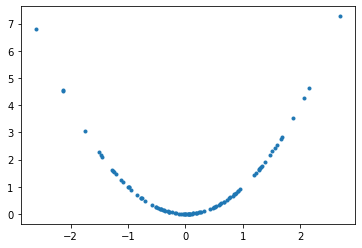

In [ ]:
def func(n: int) -> int:
    x = torch.randn(n, dtype=torch.float32)
    xx = x * x
    x = x.reshape(n,1)
    xx = xx.reshape(n,1)
    data = torch.hstack((x, xx))
    return data

data = func(100)
plt.plot(data[:, 0], data[:, 1], '.')

In [ ]:
class Desc_r(nn.Module):
    """   
    Дискриминатор - это модель с двумерным входом и одномерным выходом. 
    Он получит выборку из реальных данных или от генератора и обеспечит
    вероятность того, что выборка принадлежит реальным обучающим данным.    
    """

    def __init__(self, input: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 128),
            nn.ReLU(),        
            nn.Linear(128, 64),
            nn.ReLU(),    
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, data):
        x = self.model(data)
        return x


class Gener_r(nn.Module):
    """
    генератор - это модель, которая берет на вход выборки из скрытого 
    пространства и генерирует данные, похожие на данные в обучающем наборе.
    """

    def __init__(self, input: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 32),
            nn.ReLU(),
            nn.Linear(32, 12),
            nn.ReLU(),
            nn.Linear(12, 2),
        )

    def forward(self, data):
        x = self.model(data)
        return x

    

batch = 32
epochs = 1000
d_model = Desc_r(input = 2)
g_model = Gener_r(input = 2)
loss = nn.BCELoss()
d_opt = optim.Adam(d_model.parameters())
g_opt = optim.Adam(g_model.parameters())



tr_loader = torch.utils.data.DataLoader(data, batch_size=batch, shuffle=True, drop_last=True)
for ep in range(epochs):
    for x in tr_loader:
        label = torch.ones((batch, 1))
        generator_label = torch.zeros((batch, 1))

        fake = torch.randn((batch, 2))
        fake_generator = g_model(fake)
        """
        make data:
        [
            ori, ori, label ori,
            0.34, 0,12, 1
            ...
            fake, fake, fake label,
            0.32, 0.10, 0
        ]
        ori_data batch = 32, len data = 32
        fake data batch = 32, len data = 32
            cat = [64, 2]
        """
        sample = torch.cat((x, fake_generator))
        label_sample = torch.cat((label, generator_label))

        #train disc
        d_model.zero_grad()
        d_out = d_model(sample)
        d_loss = loss(d_out, label_sample)
        d_loss.backward()
        d_opt.step()

        #train gen
        fake = torch.randn((batch, 2))
        g_model.zero_grad()
        fake_generator = g_model(fake)
        g_d_out = d_model(fake_generator)
        g_d_loss = loss(g_d_out, label)
        g_d_loss.backward()
        g_opt.step()


    # Show loss
    if ep % 200 == 0:
        print(f"Epoch: {ep} Loss D.: {d_loss}")
        print(f"Epoch: {ep} Loss G.: {g_d_loss}")

Epoch: 0 Loss D.: 0.6760867238044739
Epoch: 0 Loss G.: 0.6170979738235474
Epoch: 200 Loss D.: 0.646969199180603
Epoch: 200 Loss G.: 0.8386499881744385
Epoch: 400 Loss D.: 0.643828272819519
Epoch: 400 Loss G.: 0.6954761743545532
Epoch: 600 Loss D.: 0.6757112741470337
Epoch: 600 Loss G.: 0.7397779226303101
Epoch: 800 Loss D.: 0.6681113839149475
Epoch: 800 Loss G.: 0.8450835943222046


In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = g_model(latent_space_samples)

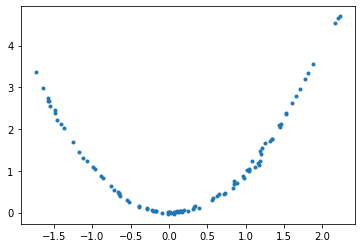

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

###2D


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)
batch_size = 32
tr_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True, drop_last = True
)
real_samples, mnist_labels = next(iter(tr_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [3]:
class Discriminator(nn.Module):

    def __init__(self, input: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),        
            nn.Linear(1024, 512),
            nn.ReLU(),    
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),          
            nn.Sigmoid()
        )

    def forward(self, data):
        # data 32, 1, 28, 28
        data = data.reshape(data.shape[0], 784)
        x = self.model(data)
        return x


class Generator(nn.Module):

    def __init__(self, input: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 64),
            nn.ReLU(),        
            nn.Linear(64, 256),
            nn.ReLU(),    
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            #-1, 1          
            nn.Tanh()
        )

    def forward(self, data):
        x = self.model(data)
        # make image
        x = x.reshape(x.shape[0], 1, 28, 28)
        return x


def tr_one_epoch_discriminator(
    model: nn.Module,
    train_data: torch.tensor,
    target: torch.tensor,
    loss_func: nn.BCELoss,
    optimizer: optim.Adam
) -> torch.tensor:
    """
    train_data: tensor, torch.Size([batch_ori+batch_fake = 64, 1, 28, 28])
    target: tensor, torch.Size([batch_ori+batch_fake = 64, 1])
    """
    model.zero_grad()
    out = model(train_data)
    loss = loss_func(out, target)
    loss.backward()
    optimizer.step()
    return loss


def tr_one_epoch_generator(
    model: nn.Module,
    input_generator: int
) -> torch.tensor:
    """
    return: tensor
        torch.Size([32, 1, 28, 28])
    """
    fake = torch.randn((batch, input_generator)).to(device=device)
    fake_generator = model(fake)
    return fake_generator

In [13]:
batch = 32
epochs = 50
lr = 0.0002 
input_generator = 100
input_discriminator = 28*28

descriminator = Discriminator(input = input_discriminator).to(device=device)
generator = Generator(input = input_generator).to(device=device)
loss = nn.BCELoss()
d_opt = optim.Adam(descriminator.parameters(), lr= lr)
g_opt = optim.Adam(generator.parameters(), lr=lr)
epoch_iterator = trange(0, epochs, desc="Epoch")
tr_iterator = tqdm(tr_loader, desc='tr_loader_iter: ')
set_seed(SEED)
for ep in epoch_iterator:
    for x,y in tr_iterator:
        # x = x.reshape(x.shape[0], 1,28, 28).to(device=device)
        x = x.to(device=device)
        label = torch.ones((batch, 1)).to(device=device)
        generator_label = torch.zeros((batch, 1)).to(device=device)
        x_g = tr_one_epoch_generator(generator, input_generator)
        generator.zero_grad()
        sample = torch.cat((x, x_g))        
        label_sample = torch.cat((label, generator_label))
        dis_loss = tr_one_epoch_discriminator(descriminator, sample, label_sample, loss, d_opt)
        x_g = tr_one_epoch_generator(generator, input_generator)
        g_d_out = descriminator(x_g)
        g_d_loss = loss(g_d_out, label)
        g_d_loss.backward()
        g_opt.step()
    # Show loss
    if ep % 5 == 0:
        print(f"Epoch: {ep} Loss D.: {dis_loss}")
        print(f"Epoch: {ep} Loss G.: {g_d_loss}")

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

tr_loader_iter:   0%|          | 0/1875 [00:00<?, ?it/s]

Epoch:   2%|▏         | 1/50 [00:39<32:11, 39.42s/it]

Epoch: 0 Loss D.: 0.17834311723709106
Epoch: 0 Loss G.: 3.7489519119262695


Epoch:  12%|█▏        | 6/50 [03:33<25:42, 35.06s/it]

Epoch: 5 Loss D.: 0.26856866478919983
Epoch: 5 Loss G.: 2.244929313659668


Epoch:  22%|██▏       | 11/50 [06:27<22:33, 34.70s/it]

Epoch: 10 Loss D.: 0.3328534960746765
Epoch: 10 Loss G.: 1.9488263130187988


Epoch:  32%|███▏      | 16/50 [09:20<19:38, 34.67s/it]

Epoch: 15 Loss D.: 0.29090940952301025
Epoch: 15 Loss G.: 2.0480780601501465


Epoch:  42%|████▏     | 21/50 [12:11<16:35, 34.33s/it]

Epoch: 20 Loss D.: 0.42828404903411865
Epoch: 20 Loss G.: 1.823258399963379


Epoch:  52%|█████▏    | 26/50 [15:03<13:42, 34.27s/it]

Epoch: 25 Loss D.: 0.4826596975326538
Epoch: 25 Loss G.: 1.3472425937652588


Epoch:  62%|██████▏   | 31/50 [17:53<10:48, 34.11s/it]

Epoch: 30 Loss D.: 0.41177597641944885
Epoch: 30 Loss G.: 1.2445441484451294


Epoch:  72%|███████▏  | 36/50 [20:43<07:56, 34.04s/it]

Epoch: 35 Loss D.: 0.4172746241092682
Epoch: 35 Loss G.: 1.4332053661346436


Epoch:  82%|████████▏ | 41/50 [23:34<05:06, 34.10s/it]

Epoch: 40 Loss D.: 0.5067169070243835
Epoch: 40 Loss G.: 1.4828965663909912


Epoch:  92%|█████████▏| 46/50 [26:24<02:16, 34.02s/it]

Epoch: 45 Loss D.: 0.3246024549007416
Epoch: 45 Loss G.: 1.4100353717803955


Epoch: 100%|██████████| 50/50 [28:41<00:00, 34.43s/it]


In [14]:
with torch.no_grad():
    x_g = torch.randn(batch_size, input_generator).to(device=device)
    gen_digits = generator(x_g)

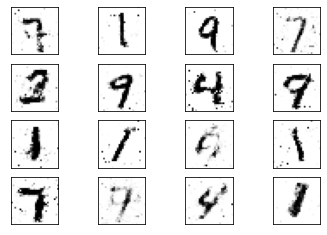

In [15]:
gen_digits = gen_digits.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(gen_digits[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
132